# k-means 

Author: Athan Zhang

*In this notebook:*
- Dataset Exploration
- kMeans Class
- Initializing and Training the Model
- Testing the Model
- Finding Ideal k


How does the k-Means algorithm work?

1. Specify number of clusters (k)
2. Assign random centroids
3. **repeat until** the centroids do not change 
    1. Assign each point to it's closest centroid
    2. Calculate new centroids
    
### Advantages


### Disadvantages
- k-Means is limited to linear cluster boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(1000)

%matplotlib inline

## Dataset Generation

Dataset dimensions: (2000, 3)


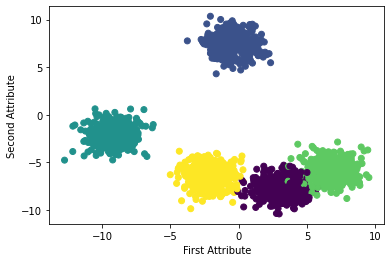

In [2]:
clusters = 5
X, Y = make_blobs(centers=clusters, 
                  n_samples=2000, 
                  n_features=3,
                  random_state=1000)

print(f"Dataset dimensions: {X.shape}")

plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("First Attribute")
plt.ylabel("Second Attribute")
plt.show()

## kMeans Class

In [3]:
class kMeans():
    def __init__(self, k=3):
        # 1. Specify number of clusters
        self.k = k
    
    def fit(self, X):
        n_samples, n_attributes = X.shape
        
        # 2. Assign random centroids
        self.centroids = X[np.random.randint(0,n_samples,self.k)]
        
        old_centroids = None
        iter_count = 0
        while (old_centroids != self.centroids).all():
            old_centroids = self.centroids
            iter_count += 1
            print(f"Iteration {iter_count}: {str(self.centroids)}")
            
            # 3A. Assign each point to its closest centroid
            cluster_assignments = self.cluster_assign(X)
            
            # 3B. Calculate new centroids
            for centroid in range(self.k):
                self.centroids[centroid] = np.mean(X[cluster_assignments==centroid], axis=0)   
        
        print(f"kMeans Training completed in {iter_count} iterations.")
                     
    def distance(self, X):  
        """
        Calculates the Euclidean distance between the
        stored training data and input data.
        """
        n_samples, n_attributes = X.shape
        dists = [np.sqrt(np.sum(((self.centroids - X[i])**2).astype(float), axis=1)) for i in range(n_samples)]
        
        return np.array(dists)
    
    def cluster_assign(self, X):
        cluster_dists = self.distance(X)
        cluster_assignments = np.argmin(cluster_dists, axis=1)
        return cluster_assignments
        

In [4]:
# Instantiate Classifier
clf = kMeans(k=clusters)
clf.fit(X)

Iteration 1: [[ 6.98011847 -5.20272     5.45699773]
 [-0.0507518   7.88025748 -5.74186413]
 [-0.12462737  9.21259884 -6.41413768]
 [-9.38467119 -1.73129509 -4.60020659]
 [-8.82106215 -3.23494048 -5.86117718]]
kMeans Training completed in 1 iterations.


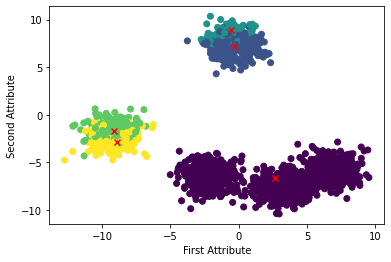

In [5]:
plt.scatter(X[:,0],X[:,1],c=clf.cluster_assign(X))
plt.scatter(clf.centroids[:,0], clf.centroids[:,1], marker='x', c='red')
plt.xlabel("First Attribute")
plt.ylabel("Second Attribute")
plt.show()